# Data Observation, Cleaning, Transformation

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('../Groupon_North_America_Data_Q4_2013_XLSX.xlsx')

In [ ]:
#replace the space of column name with _
df.columns = df.columns.str.replace(' ','_')
df.head()

,Deal_ID,Units_Sold,Gross_Billings,Start_Date,Deal_URL,Segment
0,gr-millevois-tire-service-center,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-millevois-tire...,Local
1,gr-manakeesh-cafe-bakery,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-manakeesh-cafe...,Local
2,gr-phoenix-salon-and-spa,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-phoenix-salon-...,Local
3,gr-hands-in-motion,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-hands-in-motion,Local
4,dc-fd2-bartending-college-allentown-reading,86.8,4253.2,2012-06-06,http://www.groupon.com/deals/dc-fd2-bartending...,Local


In [ ]:
df.shape

(138534, 6)

In [ ]:
#check data types
df.dtypes

Deal_ID                   object
Units_Sold               float64
Gross_Billings           float64
Start_Date        datetime64[ns]
Deal_URL                  object
Segment                   object
dtype: object

In [ ]:
df_local = df[df['Segment'] == 'Local']
df_goods = df[df['Segment'] == 'Goods']
df_travel = df[df['Segment'] == 'Travel']

In [ ]:
print(df_local.shape, df_goods.shape, df_travel.shape)

(120576, 6) (15234, 6) (2724, 6)


In [ ]:
df_local = df_local[['Units_Sold','Gross_Billings','Start_Date']]
df_goods = df_goods[['Units_Sold','Gross_Billings','Start_Date']]
df_travel = df_travel[['Units_Sold','Gross_Billings','Start_Date']]

In [ ]:
#Group the data by month and draw the line chart to see the total trend
df_local.index = pd.to_datetime(df_local['Start_Date'], format='%m/%d/%y %I:%M%p')
df_local_month = df_local.resample(rule = 'M').sum()
df_goods.index = pd.to_datetime(df_goods['Start_Date'], format='%m/%d/%y %I:%M%p')
df_goods_month = df_goods.resample(rule = 'M').sum()
df_travel.index = pd.to_datetime(df_travel['Start_Date'], format='%m/%d/%y %I:%M%p')
df_travel_month = df_travel.resample(rule = 'M').sum()

[Text(0.5, 0, '')]

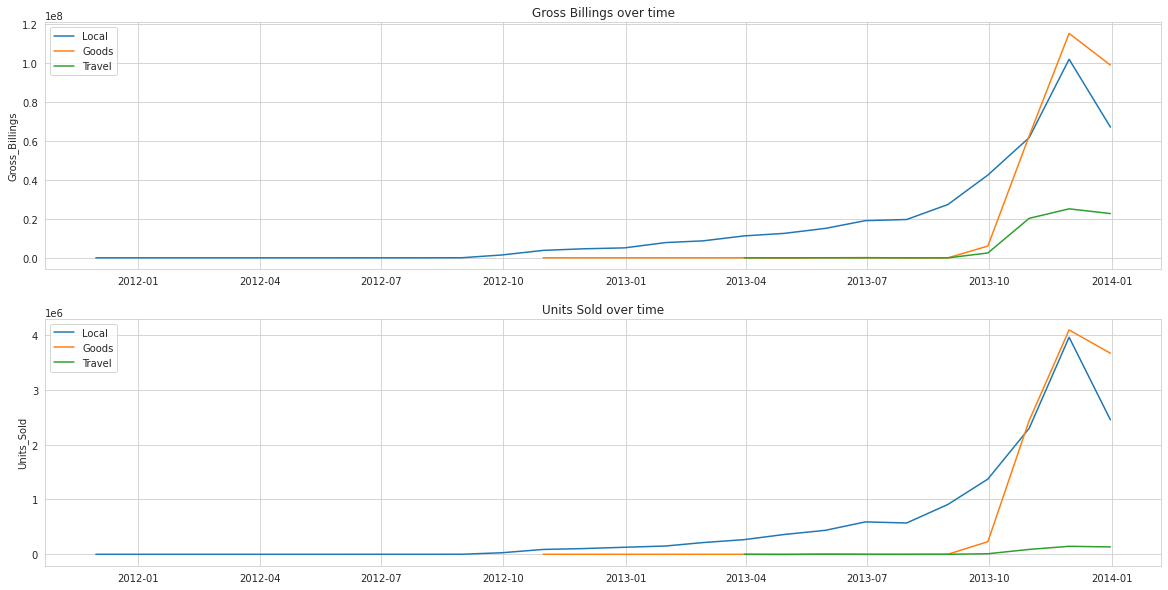

In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=2)
sns.set_style('whitegrid')
sns.lineplot(df_local_month.index, df_local_month.Gross_Billings, label='Local', ax=ax[0]).set(title='Gross Billings over time',xlabel=None)
sns.lineplot(df_goods_month.index, df_goods_month.Gross_Billings, label='Goods', ax=ax[0]).set(xlabel=None)
sns.lineplot(df_travel_month.index, df_travel_month.Gross_Billings, label='Travel', ax=ax[0]).set(xlabel=None)
sns.lineplot(df_local_month.index, df_local_month.Units_Sold, label='Local', ax=ax[1]).set(title='Units Sold over time',xlabel=None)
sns.lineplot(df_goods_month.index, df_goods_month.Units_Sold, label='Goods', ax=ax[1]).set(xlabel=None)
sns.lineplot(df_travel_month.index, df_travel_month.Units_Sold, label='Travel', ax=ax[1]).set(xlabel=None)

From the above charts, there is no huge change in data trends before year 2013, so I check the dataset and find that there are some start dates that have very small number of deals. These data will result in data bias. So, I decide to only use the year 2013 data to predict the missing data of q42013

In [ ]:
df_local_zoom = df_local.loc['2013-01-01':'2013-12-31']
df_local_zoom = df_local_zoom.resample(rule = 'D').sum()
df_goods_zoom = df_goods.loc['2013-01-01':'2013-12-31']
df_goods_zoom = df_goods_zoom.resample(rule = 'D').sum()
df_travel_zoom = df_travel.loc['2013-01-01':'2013-12-31']
df_travel_zoom = df_travel_zoom.resample(rule = 'D').sum()

In [ ]:
print(df_local_zoom.shape, df_goods_zoom.shape, df_travel_zoom.shape)

(365, 2) (282, 2) (295, 2)


In [ ]:
#Unadjusted Data estimate
df_unadjusted_local = df_local_zoom.loc['2013-09-01':'2013-12-31']
df_unadjusted_local.replace(np.nan, 0, inplace=True)
df_unadjusted_local.Gross_Billings.sum()

272808961.7839999

In [ ]:
df_unadjusted_goods = df_goods_zoom.loc['2013-09-01':'2013-12-31']
df_unadjusted_goods.Gross_Billings.sum()

282298928.92592007

In [ ]:
df_unadjusted_travel = df_travel_zoom.loc['2013-09-01':'2013-12-31']
df_unadjusted_travel.Gross_Billings.sum()

70510528.9245

[Text(0.5, 0, '')]

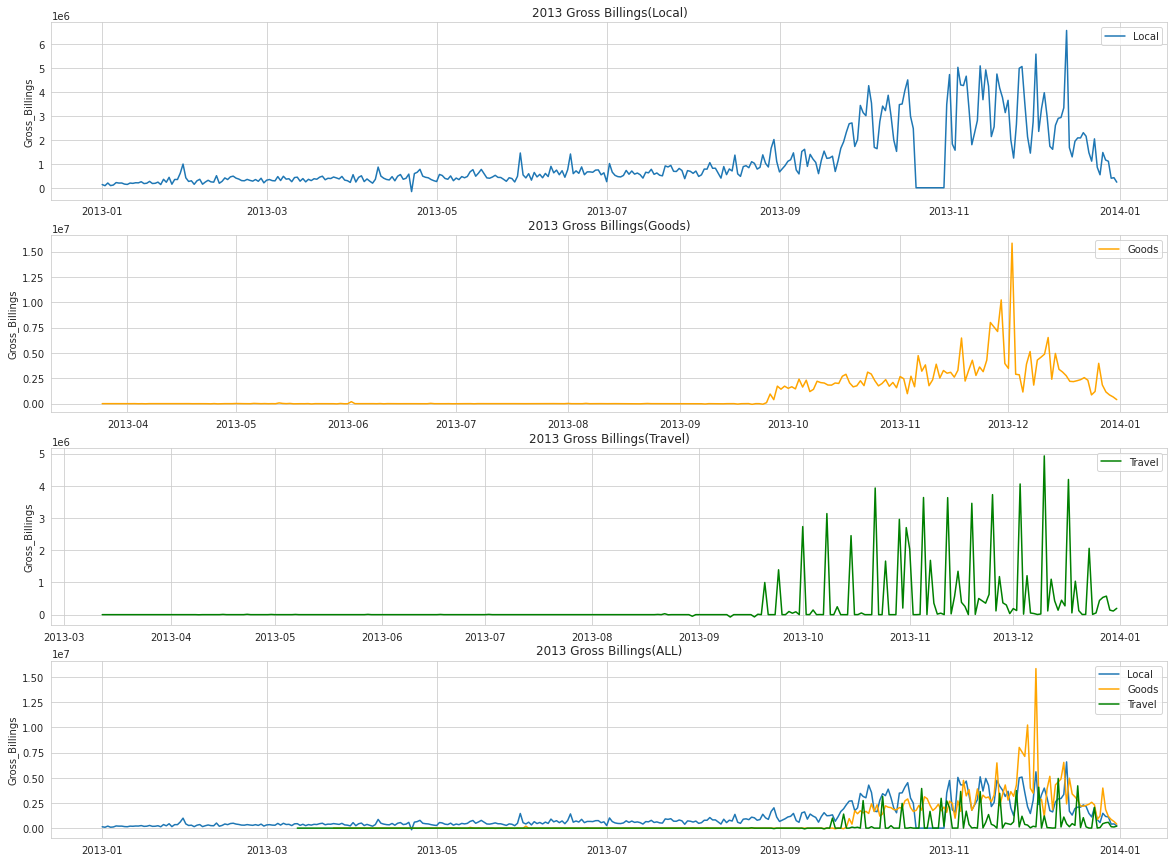

In [ ]:
#q42013 gross billings line chart
fig, ax = plt.subplots(figsize=(20,15),nrows=4)
sns.lineplot(df_local_zoom.index, df_local_zoom.Gross_Billings, label='Local', ax=ax[0]).set(title='2013 Gross Billings(Local)',xlabel=None)
sns.lineplot(df_goods_zoom.index, df_goods_zoom.Gross_Billings, label='Goods', ax=ax[1], color='orange').set(title='2013 Gross Billings(Goods)',xlabel=None)
sns.lineplot(df_travel_zoom.index, df_travel_zoom.Gross_Billings, label='Travel', ax=ax[2], color='green').set(title='2013 Gross Billings(Travel)',xlabel=None)
sns.lineplot(df_local_zoom.index, df_local_zoom.Gross_Billings, label='Local', ax=ax[3]).set(title='2013 Gross Billings(ALL)',xlabel=None)
sns.lineplot(df_goods_zoom.index, df_goods_zoom.Gross_Billings, label='Goods', ax=ax[3], color='orange').set(xlabel=None)
sns.lineplot(df_travel_zoom.index, df_travel_zoom.Gross_Billings, label='Travel', ax=ax[3], color='green').set(xlabel=None)

[Text(0.5, 0, '')]

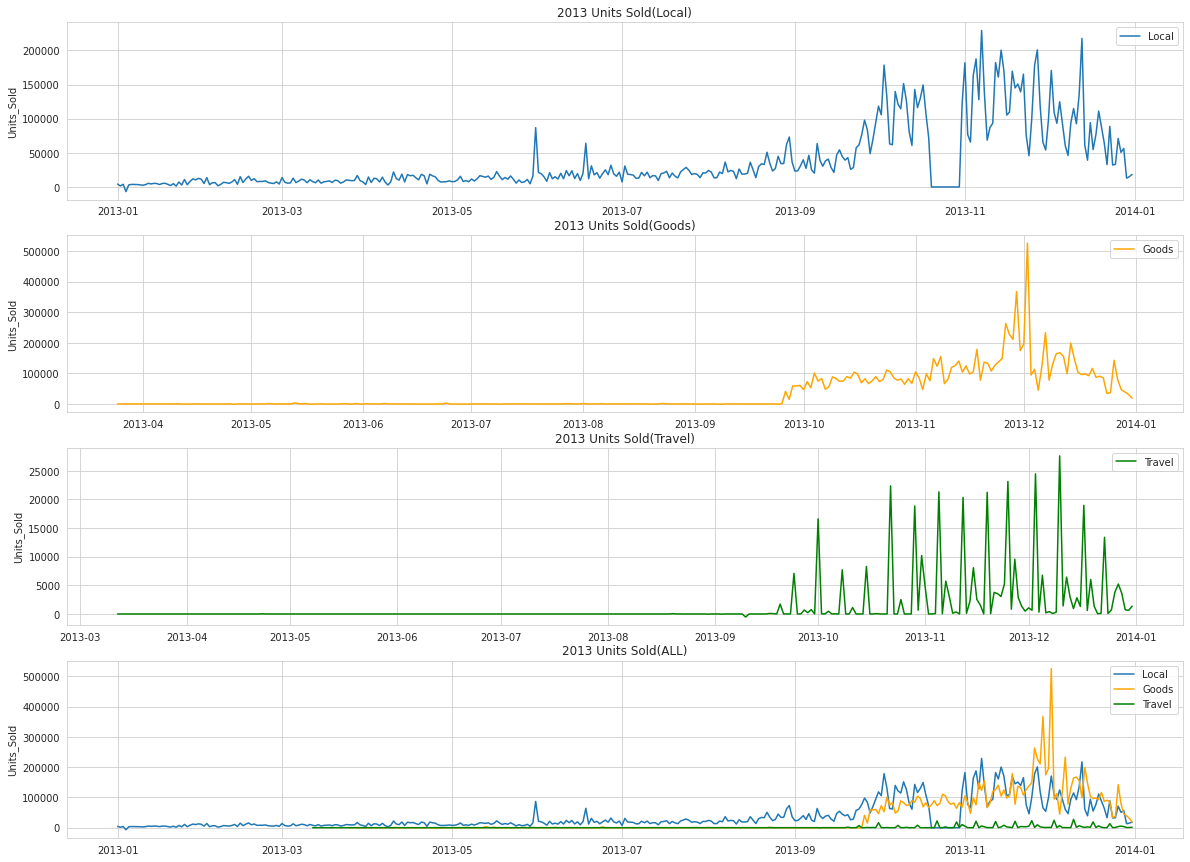

In [ ]:
#q42013 units sold line chart
fig, ax = plt.subplots(figsize=(20,15),nrows=4)
sns.lineplot(df_local_zoom.index, df_local_zoom.Units_Sold, label='Local', ax=ax[0]).set(title='2013 Units Sold(Local)',xlabel=None)
sns.lineplot(df_goods_zoom.index, df_goods_zoom.Units_Sold, label='Goods', ax=ax[1], color='orange').set(title='2013 Units Sold(Goods)',xlabel=None)
sns.lineplot(df_travel_zoom.index, df_travel_zoom.Units_Sold, label='Travel', ax=ax[2], color='green').set(title='2013 Units Sold(Travel)',xlabel=None)
sns.lineplot(df_local_zoom.index, df_local_zoom.Units_Sold, label='Local', ax=ax[3]).set(title='2013 Units Sold(ALL)',xlabel=None)
sns.lineplot(df_goods_zoom.index, df_goods_zoom.Units_Sold, label='Goods', ax=ax[3], color='orange').set(xlabel=None)
sns.lineplot(df_travel_zoom.index, df_travel_zoom.Units_Sold, label='Travel', ax=ax[3], color='green').set(xlabel=None)

# Fix the Missing Data

## Data Transformation

In [ ]:
df_local_zoom.replace(0, np.nan, inplace=True)

In [ ]:
df_before = df_local_zoom.loc['2013-02-01':'2013-11-20']
df_before.tail()

,Units_Sold,Gross_Billings
Start_Date,,
2013-11-16,105322.70,2.138585e+06
2013-11-17,109706.40,2.547565e+06
2013-11-18,169583.20,4.753226e+06
2013-11-19,144998.80,4.163731e+06
2013-11-20,150730.55,3.770763e+06


In [ ]:
df_before['Time'] = np.arange(len(df_before.index))
df_before.tail()

,Units_Sold,Gross_Billings,Time
Start_Date,,,
2013-11-16,105322.70,2.138585e+06,288
2013-11-17,109706.40,2.547565e+06,289
2013-11-18,169583.20,4.753226e+06,290
2013-11-19,144998.80,4.163731e+06,291
2013-11-20,150730.55,3.770763e+06,292


[Text(0.5, 1.0, '2013 Gross Billings')]

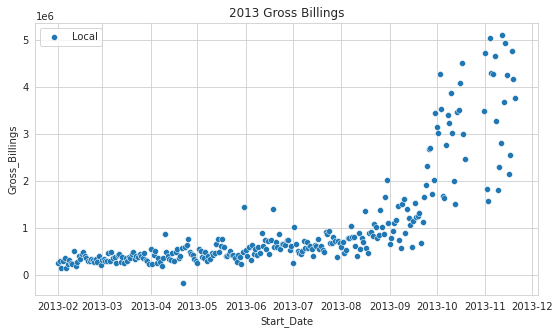

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
sns.scatterplot(df_before.index, df_before.Gross_Billings, label='Local').set(title='2013 Gross Billings')

[Text(0.5, 1.0, '2013 Units Sold')]

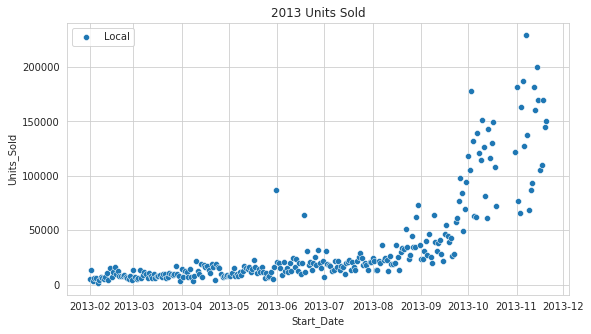

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
sns.scatterplot(df_before.index, df_before.Units_Sold, label='Local').set(title='2013 Units Sold')

In [ ]:
df_lr = df_before.copy()
df_lr_without = df_lr.dropna()
df_lr_without['Units_Sold'] = np.log(df_lr_without['Units_Sold'])
df_lr_without['Gross_Billings'] = np.log(df_lr_without['Gross_Billings'])
df_lr_without.head()

,Units_Sold,Gross_Billings,Time
Start_Date,,,
2013-02-01,8.532427,12.485428,0
2013-02-02,9.525133,12.583161,1
2013-02-03,8.124654,11.874702,2
2013-02-04,8.730133,12.580062,3
2013-02-05,8.751862,12.776345,4


[Text(0.5, 1.0, '2013 Gross Billings(after transformation)')]

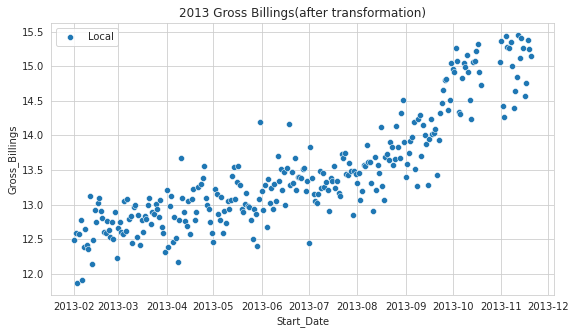

In [344]:
fig, ax = plt.subplots(figsize=(9,5))
sns.scatterplot(df_lr_without.index, df_lr_without.Gross_Billings, label='Local').set(title='2013 Gross Billings(after transformation)')

[Text(0.5, 1.0, '2013 Units Sold(after transformation)')]

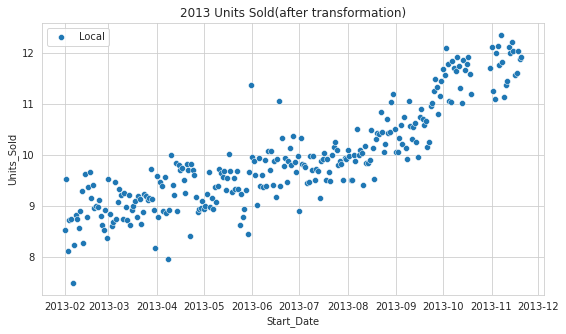

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
sns.scatterplot(df_lr_without.index, df_lr_without.Units_Sold, label='Local').set(title='2013 Units Sold(after transformation)')

## Polynomial regresssion(Gross Billings)

In [ ]:
X = df_lr_without.loc['2013-03-01':'2013-11-20']
X = X.dropna()
X = X[['Time']]
X.shape

(253, 1)

In [ ]:
y = df_lr_without.loc['2013-03-01':'2013-11-20']
y = y.dropna()
y = y['Gross_Billings']
y.shape

(253,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(202, 1) (51, 1)
(202,) (51,)


In [ ]:
for i in range(8):
  poly = PolynomialFeatures(i+2)
  X_transform = poly.fit_transform(X_train)
  regressor_poly = LinearRegression()
  regressor_poly.fit(X_transform, y_train)
  X_test_transform = poly.fit_transform(X_test)
  y_pred = regressor_poly.predict(X_test_transform)
  print('Test R-squared score for degree {} is: '.format(i+2), metrics.r2_score(y_test, y_pred))
  print('Test Root Mean Squared Error for degree {} is: '.format(i+2), np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test R-squared score for degree 2 is:  0.8742190216961496
Test Root Mean Squared Error for degree 2 is:  0.31244035681141746
Test R-squared score for degree 3 is:  0.8771405457025372
Test Root Mean Squared Error for degree 3 is:  0.3087905008861758
Test R-squared score for degree 4 is:  0.8774122764312385
Test Root Mean Squared Error for degree 4 is:  0.3084488327790704
Test R-squared score for degree 5 is:  0.8823330855313123
Test Root Mean Squared Error for degree 5 is:  0.30219468632578944
Test R-squared score for degree 6 is:  0.884288736494156
Test Root Mean Squared Error for degree 6 is:  0.2996728919085194
Test R-squared score for degree 7 is:  0.8846778443864309
Test Root Mean Squared Error for degree 7 is:  0.2991686053016001
Test R-squared score for degree 8 is:  0.8882427286135043
Test Root Mean Squared Error for degree 8 is:  0.2945082979579913
Test R-squared score for degree 9 is:  0.8920584215490724
Test Root Mean Squared Error for degree 9 is:  0.28943698343336255


From above, we can know that degree 7 is the best model

In [ ]:
poly = PolynomialFeatures(7)
X_transform = poly.fit_transform(X_train)
regressor_poly = LinearRegression()
regressor_poly.fit(X_transform, y_train)
X_test_transform = poly.fit_transform(X_test)
y_pred = regressor_poly.predict(X_test_transform)
print('R-squared score is: ', metrics.r2_score(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-squared score is:  0.8846778443864309
Root Mean Squared Error: 0.2991686053016001


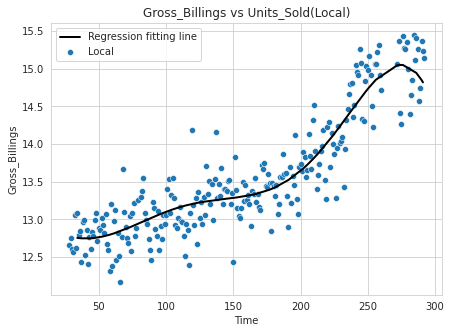

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(df_lr_without.loc['2013-03-01':'2013-11-20']['Time'], df_lr_without.loc['2013-03-01':'2013-11-20']['Gross_Billings'], label='Local').set(title='Gross_Billings vs Units_Sold(Local)')
sns.lineplot(X_test['Time'],y_pred, label='Regression fitting line',color='black',linewidth=2)

In [ ]:
df_lr_with = df_lr.loc['2013-10-20':'2013-10-30']
df_lr_with.replace(np.nan, 0, inplace=True)

In [ ]:
X_test_gs = df_lr_with[['Time']]

In [ ]:
poly = PolynomialFeatures(7)
X_gs_transform = poly.fit_transform(X_test_gs)
y_pred_gs = regressor_poly.predict(X_gs_transform)

In [ ]:
df_lr_with.loc['2013-10-20':'2013-10-30']['Gross_Billings'] = y_pred_gs
df_missing_gs = df_lr_with[['Gross_Billings', 'Time']]
df_missing_gs['Gross_Billings'] = np.exp(df_missing_gs['Gross_Billings'])
df_missing_gs

,Gross_Billings,Time
Start_Date,,
2013-10-20,3.079064e+06,261
2013-10-21,3.124849e+06,262
2013-10-22,3.168595e+06,263
2013-10-23,3.210063e+06,264
2013-10-24,3.249007e+06,265
2013-10-25,3.285179e+06,266
2013-10-26,3.318328e+06,267
2013-10-27,3.348204e+06,268
2013-10-28,3.374559e+06,269


In [ ]:
df_missing_gs['Gross_Billings'].sum()

35970726.79841088

So the estimated gross billing of local segment outage is **35970726.8**

## Polynomial regression(Units Sold)

In [ ]:
X = df_lr_without.loc['2013-03-01':'2013-11-20'][['Time']]
X.shape

(254, 1)

In [ ]:
y = df_lr_without.loc['2013-03-01':'2013-11-20']['Units_Sold']
y.shape

(254,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(203, 1) (51, 1)
(203,) (51,)


In [ ]:
for i in range(6):
  poly = PolynomialFeatures(i+2)
  X_transform = poly.fit_transform(X_train)
  regressor_poly = LinearRegression()
  regressor_poly.fit(X_transform, y_train)
  X_test_transform = poly.fit_transform(X_test)
  y_pred = regressor_poly.predict(X_test_transform)
  print('R-squared score for degree {} is: '.format(i+2), metrics.r2_score(y_test, y_pred))
  print('Root Mean Squared Error for degree {} is: '.format(i+2), np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-squared score for degree 2 is:  0.8406960719020171
Root Mean Squared Error for degree 2 is:  0.39318596416002694
R-squared score for degree 3 is:  0.842294511856135
Root Mean Squared Error for degree 3 is:  0.39120839631706295
R-squared score for degree 4 is:  0.8472420740816009
Root Mean Squared Error for degree 4 is:  0.3850229704763906
R-squared score for degree 5 is:  0.8585868531845547
Root Mean Squared Error for degree 5 is:  0.37045004941187776
R-squared score for degree 6 is:  0.8607223198832131
Root Mean Squared Error for degree 6 is:  0.367642343597388
R-squared score for degree 7 is:  0.8600846595999839
Root Mean Squared Error for degree 7 is:  0.36848297795907187


From above, we can know that degree 7 is the best model

In [ ]:
poly = PolynomialFeatures(7)
X_transform = poly.fit_transform(X_train)
regressor_poly = LinearRegression()
regressor_poly.fit(X_transform, y_train)
X_test_transform = poly.fit_transform(X_test)
y_pred = regressor_poly.predict(X_test_transform)
print('R-squared score is: ', metrics.r2_score(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-squared score is:  0.8600846595999839
Root Mean Squared Error: 0.36848297795907187


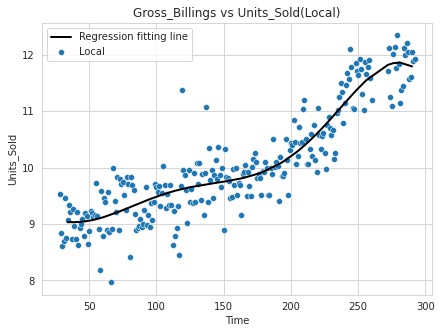

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(df_lr_without.loc['2013-03-01':'2013-11-20']['Time'], df_lr_without.loc['2013-03-01':'2013-11-20']['Units_Sold'], label='Local').set(title='Gross_Billings vs Units_Sold(Local)')
sns.lineplot(X_test['Time'],y_pred, label='Regression fitting line',color='black',linewidth=2)

In [ ]:
df_lr_with = df_lr.loc['2013-10-20':'2013-10-30']
df_lr_with.replace(np.nan, 0, inplace=True)

In [ ]:
X_test_us = df_lr_with[['Time']]

In [ ]:
poly = PolynomialFeatures(7)
X_us_transform = poly.fit_transform(X_test_us)
y_pred_us = regressor_poly.predict(X_us_transform)

In [ ]:
df_lr_with.loc['2013-10-20':'2013-10-30']['Units_Sold'] = y_pred_us
df_missing_us = df_lr_with[['Units_Sold', 'Time']]
df_missing_us['Units_Sold'] = np.exp(df_missing_us['Units_Sold'])
df_missing_us

,Units_Sold,Time
Start_Date,,
2013-10-20,114955.349126,261
2013-10-21,117177.259504,262
2013-10-22,119357.789559,263
2013-10-23,121488.946105,264
2013-10-24,123562.442055,265
2013-10-25,125569.727240,266
2013-10-26,127502.024150,267
2013-10-27,129350.368671,268
2013-10-28,131105.655840,269


In [ ]:
df_missing_us['Units_Sold'].sum()

1377128.4960524007

So the estimated units sold of local segment outage is **1377128.5**